Import the usual libraries

In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

We shall work with the dataset found in the file 'murderdata.txt', which is a 20 x 5 data matrix where the columns correspond to

Index (not for use in analysis)

Number of inhabitants

Percent with incomes below $5000

Percent unemployed

Murders per annum per 1,000,000 inhabitants

**Reference:**

Helmut Spaeth,
Mathematical Algorithms for Linear Regression,
Academic Press, 1991,
ISBN 0-12-656460-4.

D G Kleinbaum and L L Kupper,
Applied Regression Analysis and Other Multivariable Methods,
Duxbury Press, 1978, page 150.

http://people.sc.fsu.edu/~jburkardt/datasets/regression

**What to do?**

We start by loading the data; today we will study how the number of murders relates to the percentage of unemployment.

In [46]:
data = np.loadtxt('murderdata.txt')
print(data)
N, d = data.shape

unemployment = data[:,3]
murders = data[:,4]

[[1.000e+00 5.870e+05 1.650e+01 6.200e+00 1.120e+01]
 [2.000e+00 6.430e+05 2.050e+01 6.400e+00 1.340e+01]
 [3.000e+00 6.350e+05 2.630e+01 9.300e+00 4.070e+01]
 [4.000e+00 6.920e+05 1.650e+01 5.300e+00 5.300e+00]
 [5.000e+00 1.248e+06 1.920e+01 7.300e+00 2.480e+01]
 [6.000e+00 6.430e+05 1.650e+01 5.900e+00 1.270e+01]
 [7.000e+00 1.964e+06 2.020e+01 6.400e+00 2.090e+01]
 [8.000e+00 1.531e+06 2.130e+01 7.600e+00 3.570e+01]
 [9.000e+00 7.130e+05 1.720e+01 4.900e+00 8.700e+00]
 [1.000e+01 7.490e+05 1.430e+01 6.400e+00 9.600e+00]
 [1.100e+01 7.895e+06 1.810e+01 6.000e+00 1.450e+01]
 [1.200e+01 7.620e+05 2.310e+01 7.400e+00 2.690e+01]
 [1.300e+01 2.793e+06 1.910e+01 5.800e+00 1.570e+01]
 [1.400e+01 7.410e+05 2.470e+01 8.600e+00 3.620e+01]
 [1.500e+01 6.250e+05 1.860e+01 6.500e+00 1.810e+01]
 [1.600e+01 8.540e+05 2.490e+01 8.300e+00 2.890e+01]
 [1.700e+01 7.160e+05 1.790e+01 6.700e+00 1.490e+01]
 [1.800e+01 9.210e+05 2.240e+01 8.600e+00 2.580e+01]
 [1.900e+01 5.950e+05 2.020e+01 8.400e+00 2.17

Let's start out by looking at our data

(-10.0, 50.0)

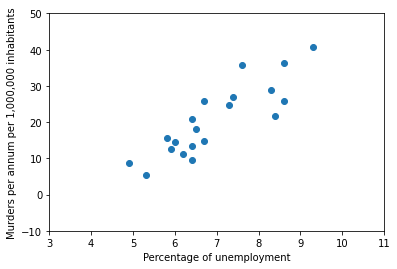

In [47]:
plt.scatter(unemployment, murders)
plt.xlabel('Percentage of unemployment')
plt.ylabel('Murders per annum per 1,000,000 inhabitants')
plt.xlim([3,11])
plt.ylim([-10,50])

In [56]:
def linreg_univar_analytic(x,y):
    """ 
    Computes an optimal solution for linear regression (1D case)
    
    Parameters
    ----------
    x : A numpy array containing the input variables
    t : A numpy array containing the output variables
    
    """
    
    # compute w_0 and w_1 using np.dot and np.mean 
    
    
    w1 = ((np.dot(unemployment, murders)/20) - np.mean(unemployment) * np.mean(murders)) / ((unemployment**2) - (np.mean(unemployment)**2))
    
    #vector = np.vectorize(np.int_)
    #y1 = np.array(w1)
    #x1 = np.array(list(map(np.int_, y1)))
    
    w0 = np.mean(murders) - w1 * np.mean(unemployment)
    #vector = np.vectorize(np.int_)
    #y0 = np.array(w0)
    #x0 = np.array(list(map(np.int_, y0)))
    
    return w0, w1

In [57]:
w0, w1 = linreg_univar_analytic(unemployment, murders)
print((w0,w1))

(array([27.60975169, 30.09638118, 18.79992642, 23.96744963,  7.48949772,
       25.68609422, 30.09638118, 13.53866038, 23.391903  , 30.09638118,
       26.18948754, 10.37413429, 25.271971  , 17.94246045, 32.19914617,
       17.30186757, 41.78054132, 17.94246045, 17.54480515, 41.78054132]), array([-1.01510479, -1.37366708,  0.25523772, -0.48989901,  1.8861575 ,
       -0.73772087, -1.37366708,  1.0138918 , -0.40690743, -1.37366708,
       -0.81030823,  1.47020414, -0.67800591,  0.37888097, -1.6768776 ,
        0.47125197, -3.05847748,  0.37888097,  0.43622132, -3.05847748]))


ValueError: operands could not be broadcast together with shapes (20,) (100,) 

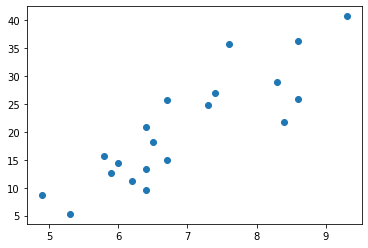

In [30]:
plt.scatter(unemployment, murders)
xplot = np.linspace(4,10,100)
yplot = w0 + w1*xplot
plt.plot(xplot, yplot, 'r')
plt.xlabel('Percentage of unemployment')
plt.ylabel('Murders per annum per 1,000,000 inhabitants')
plt.xlim([3,11])
plt.ylim([-10,50])